# Problem Set 2

For this second homework, we will start looking at unsupervised learning. Now that you know how to use the Keras library on the MNIST dataset, and learned how to build a convolutional  neural network, we will also build a generative adversarial network (GAN) to create additional new samples and make the learning process more robust against potential adversarial samples.

## 2.1 Unsupervised Learning

In this exercice, you will be asked to perform simple classification and dimensionality reduction. 
You will also be asked to code a simple K-means classifier from scratch. 

### 2.1.1 Simple K-means (5 pts)

K means is a simple algorithm that learns clusters from a given dataset by defining a set of centroids (cluster centers) and then updating those centroids by iteratively redefining the class of each point from the training set. 

For a given set of prototypes, K means classifies the prototypes by predefining a set of centroids, $m_k$, $k=1,\ldots, K$ (the black crosses in the figure below). Given a first guess for those centroids, the algorithm then associates each prototype to the nearest centroid, i.e.  

For a point $\boldsymbol{x}_i$, we define its cluster as 
$$i\in \mathcal{C}_k \quad \text{if}\quad \|\boldsymbol{x}_i - \boldsymbol{m}_k\|\leq \|\boldsymbol{x}_i - \boldsymbol{m}_\ell\|, \quad \forall \ell$$

After associating the prototypes to their centroid, in a second step, the algorithm updates the centroids by choosing the centers of mass of each newly defined cluster.The algorithm thus iterates on the following two steps:

1. For a gievn choice of centroids, assign each prototype to the cluster represented by the nearest centroid. This gives a particular clustering

2. Given a clustering, define the new centroids as the centers of mass of each cluster, i.e.
$$m_k \leftarrow \frac{\sum_{i\in \mathcal{C}_k} \boldsymbol{x}_i}{N_k}$$

where $N_k$ is the number of prototypes classified as belonging to the $k^{th}$ cluster.

3. The algorithm keeps on iterating until the assignment does not change anymore

<img src="kmeansImage1.png" width="400">
source: 

As a warm up, we will start with a simple 2D data set with 3 classes.  

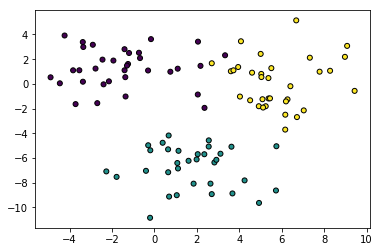

In [19]:
import matplotlib.pyplot as plt

from sklearn.datasets import make_blobs

X1, Y1 = make_blobs(n_features=2, centers=3,cluster_std = 1.8)

plt.scatter(X1[:, 0], X1[:, 1], marker='o', c=Y1,
            s=25, edgecolor='k')
plt.figure(figsize=(8, 8))
plt.show()


Code a simple K-means algorithm with an option to plot, at each iteration, the position of the centroids. Benchmark your algorithm on the blob dataset above.
(The option can be a line that one can comment/uncomment if you prefer)


In [ ]:
# put your code here








### 2.1.2 Text mining (5pts)

In this exercice, we will keep your K-means algorithm from exercice 2.1.1 but apply it to a text mining problem. We will group subsets of documents according to the meaning of these documents. 

In our simplified framework, our documents are simple sentences given below. Note that the principle would be exactly the same if you were to work with larger documents or even webpages.

How many classes are there according to you ? What are those classes ? 


In [62]:
documents = ["This little dog came to play when I was eating at a restaurant.",
             "Our neighbours have a big brown dog.",
             "The google Translate app for phones is incredible.",
"Aw, this is cool weather for Norfolk, Leo replied.",
"Rain is forecast for this evening",
             "The number of tabs you can open on a Google browser on today's computers is amazing.",
             "Best dog photo I've ever taken.",
             "We are expecting heavy rains and thunder this week end.",
"A dog is barking",
"A breath of almost spring-like weather assailed him.",
"Google researchers estimated there were one hundred trillion words on the Internet.",
"The balmy weather of Thanksgiving Day had given way to a frosty day after.",
"The sun is shining",
"Keep away from that dangerous dog.",
             "The Google assistant for phones is now making miracles.",
"The forecast says it will begin to rain tonight.",
             "With Google maps you can find your way everywhere.",
"Beware of the dog",
"The weather made outdoor activities unrealistic",
"My cousin was attacked by a dogfish while swimming in Cancun",
"Search engines such as Google exist to solve this problem.",
"The weather is supposed to be nice this weekend.",
"The weather forecast is not necessarily reliable",
"A dog bit her on the leg."]

In order to apply K means to the sentences above, we first need to turn those sentences into 
numerical values. There are several ways to implement this step (including __countvectorizer__ and __tf-idf__).

Here we will use the __TfidfVectorizer__ from __scikit-learn__. __tf-idf__ is used to classify documents for example in search engines. In the list above, each sentence should be understood as a document. 

In __countvectorizer__, every word would be given the same weight and would thus be represented by a vector in which each entry is either 0 or 1 depending on whether the word appears in the document or not.

__Tf-idf__ goes one step further and computes a statistics telling how important the particular word is for the document. 

Tfidf has two parts:

1. A Term frequency which indicates how often a particular word appears in a document (tf)

2. An inverse document frequency (idf) which is calculated by taking the log of the number of docs in the list divided by the number of docs in which the particular word appears

The total weight is then given by weight = tf*idf

To understand the value of this decomposition, think of the work "the". This word would happen a lot in each of the documents. However it is not really representative of the documents meaning. "the" will have a large __tf__. However as it appear in almost all documents, the log ratio will be 0 or close to zero and so will be the resulting (idf) index. 


In [63]:
from sklearn.feature_extraction.text import TfidfVectorizer
import scipy as sp

In [64]:
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(documents)
#print(X)

print(X)

  (0, 111)	0.21440608328739783
  (0, 67)	0.3325776879978497
  (0, 34)	0.2018102296882023
  (0, 26)	0.3325776879978497
  (0, 113)	0.22894692913014555
  (0, 88)	0.3325776879978497
  (0, 127)	0.3325776879978497
  (0, 120)	0.29433065828496924
  (0, 36)	0.3325776879978497
  (0, 10)	0.3325776879978497
  (0, 95)	0.3325776879978497
  (1, 34)	0.26189979726845436
  (1, 84)	0.4316036367295211
  (1, 74)	0.4316036367295211
  (1, 53)	0.4316036367295211
  (1, 20)	0.4316036367295211
  (1, 23)	0.4316036367295211
  (2, 109)	0.20449801475794668
  (2, 51)	0.28103847267497767
  (2, 116)	0.4359350446013425
  (2, 5)	0.4359350446013425
  (2, 46)	0.3226412317856013
  (2, 86)	0.38580173378266486
  (2, 61)	0.23693777086823978
  (2, 59)	0.4359350446013425
  :	:
  (20, 43)	0.34699805278240115
  (20, 99)	0.34699805278240115
  (20, 89)	0.34699805278240115
  (21, 111)	0.26721486046945775
  (21, 113)	0.28533715454527186
  (21, 109)	0.1944392451314768
  (21, 61)	0.22528336700620757
  (21, 123)	0.26721486046945775
  (21

Print the matrix X above. This matrix should be of the form
(Document index, Specific word-vector index) TFIDF score for the word in the document


In [67]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score

vectorizer = TfidfVectorizer(stop_words = 'english')
X = vectorizer.fit_transform(documents)

true_k = 3




model = KMeans(n_clusters=true_k, init='k-means++', max_iter=200, n_init=1)
model.fit(X)

print("Top terms per cluster:")
order_centroids = model.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names()
for i in range(true_k):
    print("Cluster %d:" % i),
    for ind in order_centroids[i, :20]:
        print(' %s' % terms[ind]),
    print

print("\n")
print("Prediction")

Y = vectorizer.transform(["Google chrome browser to open."])
prediction = model.predict(Y)
print(prediction)

Y = vectorizer.transform(["My dog is hungry."])
prediction = model.predict(Y)
print(prediction)
 

Top terms per cluster:
Cluster 0:  google  way  phones  shining  sun  maps  day  incredible  making  app  translate  miracles  assistant  swimming  attacked  cousin  dogfish  cancun  problem  exist
Cluster 1:  weather  forecast  rain  evening  necessarily  reliable  activities  supposed  unrealistic  weekend  nice  outdoor  assailed  breath  spring  like  tonight  says  begin  norfolk
Cluster 2:  dog  beware  barking  away  leg  dangerous  bit  neighbours  brown  big  ve  taken  best  photo  restaurant  eating  came  play  little  exist


Prediction
[0]
[2]


## 2.2. Dimensionality reduction (5pts)

## 2.3. Generative adversarial network (5 pts)

In this exercice, we will study how one can combine two neural networks to design a classifier that is robust against adversarial examples. Although the exercice is long, you will be guided through it and given all the necessary information. 

A generative Adversarial network (GAN) works by combining two interacting neural networks. GANs constitute one of the most promising approaches of the last few years. 

The first neural network is used to generate images that are as close as possible to the true data distribution (e.g. digits). The second neural network is trained to discriminate between the images produced by the generator and the images from the dataset (See the image below)


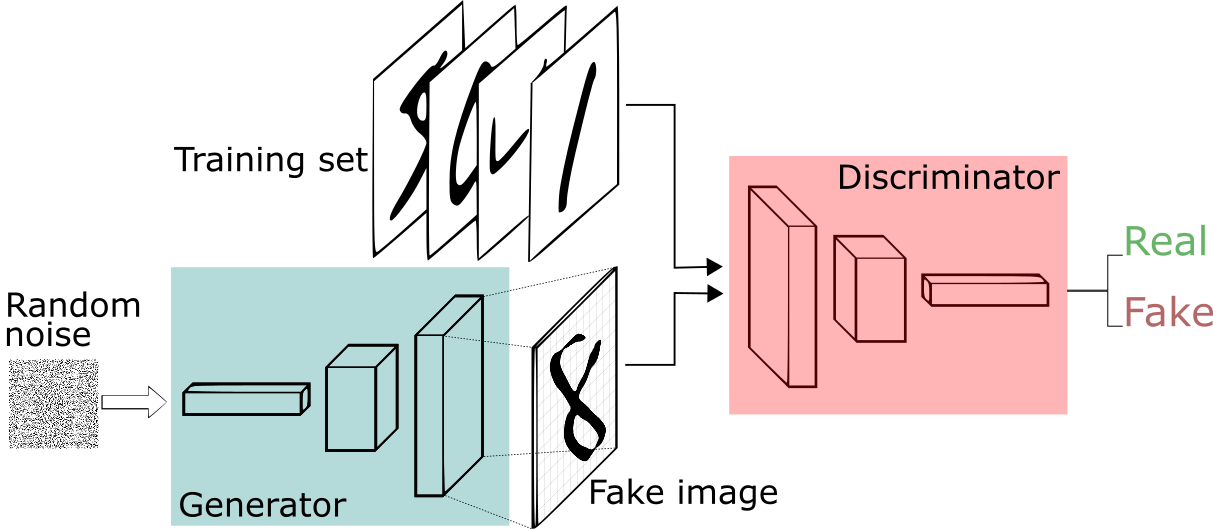

In [1]:
from IPython.display import Image
Image(filename='GANimage1.png')


Generative Adversarial networks 

In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Dense

We will start by building the __discriminator__. At the ouptut of the discriminator, we want a [0,1] scalar indicating the probability that the input was a digit from the original dataset.

For this discriminator, we again use the sequential model from Keras. 

- We will add four layers with 40*k (k=1,2,4,8) filters of size [5,5] each. For those filters set the activation function to be the LeakyReLU. In summary, you need to set three parameters
  1. The number of units (40*k)
  2. The size of each of the filters (5 by 5)
  3. The filter stride (see session 2, that is the number of pixels by which we translate the filters when doing the convolutions)
  4. Use padding = 'same' for now
  5. Finally set the activation to LeakyReLU with parameter alpha = 0.2
  6. For the first layer you also need to set the size of the input which for the MNIST dataset is 20. I.e input_size = (28,28,1)  
    
- After each of those layers, we will add a dropout layer setting 40% of the units to zero at random when training the network (keep all the other parameters to their default values) (see the figure below)
- As in the second programming session, after the convolutions, we add a flattening layer which takes the image and reorganize it as a vector. (no argument needed here just add flatten)
- Then add a fully connected layer which sums up the entries of the (flattened) vector and pass it to a sigmoid in order to get a [0,1] output indicating whether the input was generated by the generator or is from the training set. This can be done with two lines: one that add a Dense layer with one unit and a second which adds a sigmoid. 

Ok we are now done with the __discriminator__. Check the model using the command model.summary().

In [ ]:
# put your code here 






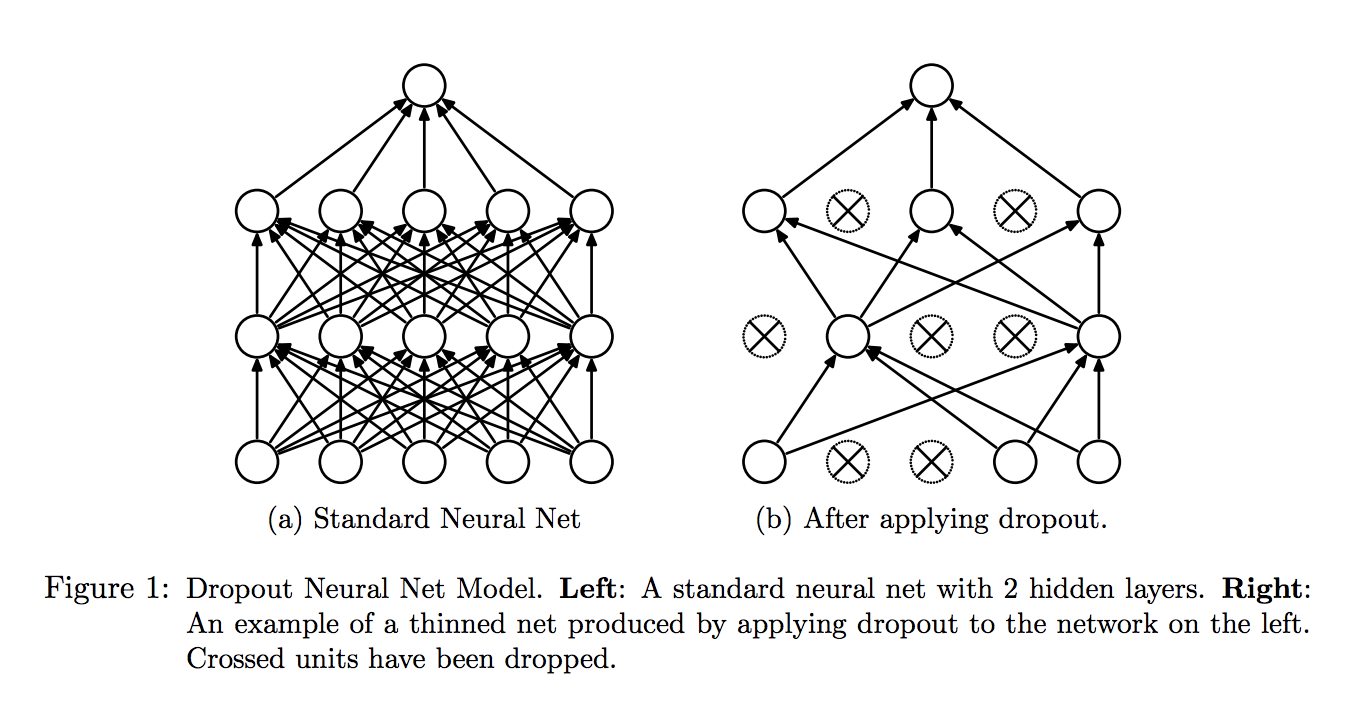

In [2]:
from IPython.display import Image
Image(filename='DropoutHinton.png')
source: Srivastava et al. Dropout: A Simple Way to Prevent Neural Networks from
Overfitting

We now build the generator. The generator is a second neural network that synthesizes images 
from a vector of noise (see above). The hope underlying the construction of a generative model is that it could ultimately capture the feature 

from IPython.display import Image
Image(filename='GenerativeImage1.png')
source: https://openai.com/

We will use a generator of the form shown below. To build this generator we will use the notion of 
transposed convolution. Recall that a convolution is an operation that takes as input an image and ouput a local average of the pixels from the input image (see the figure below as a reminder) 

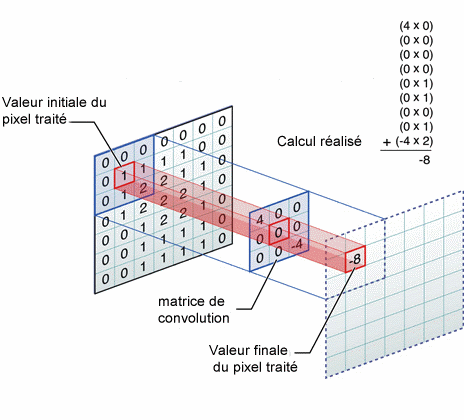

In [6]:
from IPython.display import Image
Image(filename='convolutionExplained1.png')

In the generative model, we want to generate images that have local coherence. To achieve this, the transposed convolution start from a smaller image, padds it with a border of zero and then apply to the extended result a convolution operator. In the example below the transposed convolution takes as input a 2x2 image and a 3x3 filter with a stride of 1


![SegmentLocal](transposedConvolution.gif "segment")

The output to the deconvolution operator is computed as follows (see the Keras doc)

new_rows = ((rows - 1) * strides[0] + kernel_size[0]
            - 2 * padding[0] + output_padding[0])
new_cols = ((cols - 1) * strides[1] + kernel_size[1]
            - 2 * padding[1] + output_padding[1])
            
When choosing padding ='same' which is what we will do here, the size of the padding (the zeros you add to the original image) is set so that the output has the same size as the input. 

As a consequence, if we take a filter of size k then we need to padd the original image with (k-1)/2 zeros. This is calculated automatically when setting padding = 'same'.


To build the generator, follow the instructions below

 - Take a sequential model from Keras
 - Start the model with a dense layer 49*(64*3) units with input dimension = 100 (we take a random vector of size 100 as our input)
 - After the first input layer we will add a (batch) normalization step. Batch normalization works by normalizing the inputs of the non linearity (see https://arxiv.org/pdf/1502.03167.pdf for more details)
 
 $$x_i \leftarrow \frac{x_i - \mu_i}{\sigma_i}$$ 
 
 After normalization, to avoid restricting the input to entral part of the non linearity, batch normalization adds two parameters $\gamma$ and $\beta$ which are "learned" automatically while training the network. This output to the batch normalization step thus reads as
 
 $$x_i \leftarrow \gamma\frac{x_i - \mu_i}{\sigma_i} + \beta $$
 
 This prevent a large variability in the input distribution to each layer. More details can be found in https://arxiv.org/pdf/1502.03167.pdf
 
When adding the BatchNormalization step, you only need to specify one parameter, the momentum which you can take to be .9

- You can now add the activation unit. We choose to add a 'Relu'
- Add a Reshape Layer that turns the output of the previous steps (size at that point should be 7*7*N) into a set of N images (i.e a variable of size (7,7,N))
- Finally, add the dropout step to set 40% of the units to zero

In [ ]:
# put your code here



Ok. We now have a set of images of size 7 by 7 whereas we would like one artificial image of size 28 by 28. 

- Add an upsampling step (Upsampling2D). This will interpolate the input images by repeating each row and each column once. The image should now be of size 14 by 14

- Add a first transposed convolutional layer (Conv2DTranspose) with three parameters:
    1. The depth = D/2 (see above)
    2. The filter size = 5
    3. padding = same
- Add a batch normalization step with same momentum (.9) as before
- Add the activations (relu) and upsample one more time. We now have a set of images of size 28 by 28. 

- Add twice the following combination (using a number of units D/4 and D/8)

    1. 2D Transposed convolutional layer
    2. Batch Normalization layer (same momentum as before)
    3. Activation (relu)
    
We now still have a collection of 28 by 28 images generated by each of the hidden units and we want a single 28 by 28 output. 

- Add a last transposed convolutional layer with a single hidden unit (5 by 5 filters and padding same)
- Add a sigmoid activation (for this example, we want the pixel values to lie in [0,1])
- Check the summary of your model by using model.summary()
    


In [ ]:
# put your code here




We now have both the discriminator and the generator and we are almost there. Before training the GAN, we need to do a couple more steps. First we need to set up the learning process as we did during class for the simple convolutional neural network.

1. Set up Discriminator

 - As we did in the programming session for the simple CNN, first define the optimizer. Use the RMSProp optimizer from Keras with a learning rate of .0008, a weight decay of 6e-8 and set an additional clipvalue parameter equal to 1 (so 3 parameters in total)
 
 - Use the compile function to set up the learning as we did during class. Use the binary cross entropy loss with the optimizer you defined above and set the metric to 'accuracy' (3 parameters in total)
 
 
 
 
 
 

In [ ]:
# put your code here


